<h1 align="center">Balance Scale Classification - UCI</h1>

Analysis of the <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale">UCI Balance Scale Dataset. </a>

# Get the Data

In [1]:
import pandas as pd
import numpy as np

%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'

balance_df = pd.read_csv(url, header=None)

In [3]:
balance_df.columns = ['class_name', 'left_weight', 'left_distance', 'right_weight', 'right_distance']

In [4]:
balance_df.head()

,class_name,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


# Check for Class Imbalance

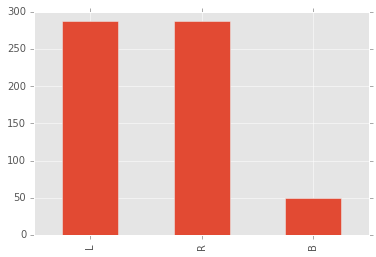

In [5]:
counts = balance_df['class_name'].value_counts()
counts.plot(kind='bar')

# Feature Importances

Now we check for feature importances. However, this requires all feature values to be positive.

In [6]:
from sklearn.feature_selection import f_classif

In [7]:
features = balance_df.drop('class_name', axis=1)
names = balance_df['class_name']

In [8]:
# check for negative feature values
features[features < 0].sum(axis=0)

left_weight       0.0
left_distance     0.0
right_weight      0.0
right_distance    0.0
dtype: float64

In [9]:
t_stats, p_vals = f_classif(features, names)

feature_importances = pd.DataFrame(np.column_stack([t_stats, p_vals]), 
                                   index=features.columns.copy(), 
                                   columns=['t_stats', 'p_vals'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

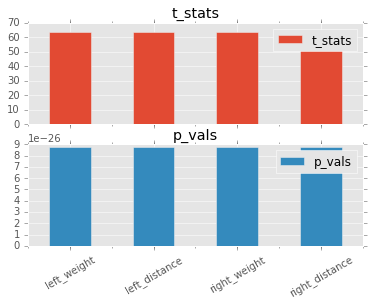

In [10]:
feature_importances.plot(subplots=True, kind='bar')
plt.xticks(rotation=30)

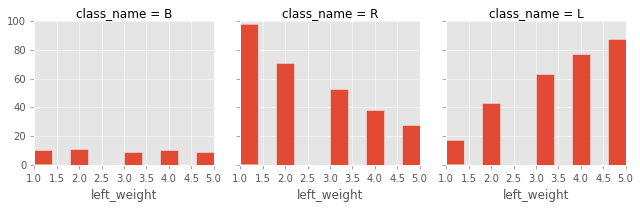

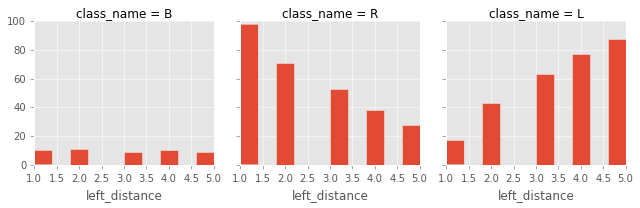

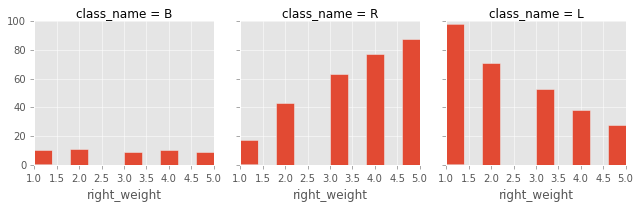

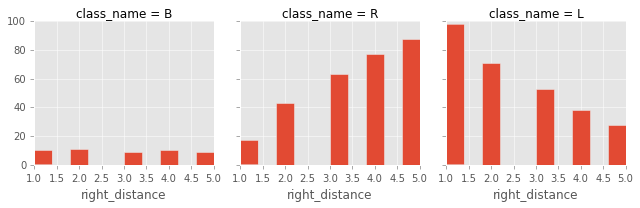

In [11]:
import seaborn as sns

for colname in balance_df.columns.drop('class_name'):
    fg = sns.FacetGrid(col='class_name', data=balance_df)
    fg = fg.map(pylab.hist, colname)

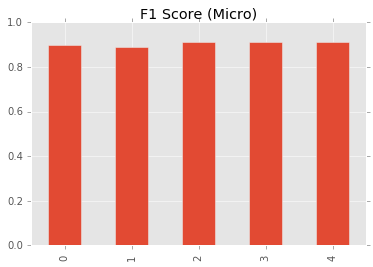

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

estimator = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

f1 = cross_val_score(estimator, features, names, cv=cv, scoring='f1_micro')
pd.Series(f1).plot(title='F1 Score (Micro)', kind='bar')

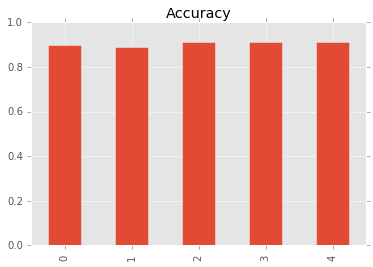

In [14]:
estimator = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

f1 = cross_val_score(estimator, features, names, cv=cv, scoring='accuracy')
pd.Series(f1).plot(title='Accuracy', kind='bar')